# Lektion 6

In [1]:
from sympy import *
init_printing()
import numpy as np
import matplotlib.pyplot as plt

interaktiv

In [2]:
#%matplotlib notebook

für den Druck

In [3]:
%matplotlib inline 

## Schleifen

Blöcke werden durch Einrückung festgelegt

In [4]:
summe = 0
for j in range(10):
    summe = summe + j
summe

Probe

In [5]:
np.arange(10).sum()

45

## if/elif/else

In [6]:
12 % 3  # modulo

In [7]:
for a in range(7):
    if a % 3 == 0:
        print(a, 'ist durch 3 teilbar')
    elif a % 3 == 1:
        print(a, 'lässt Rest 1')
    else:
        print(a, 'lässt Rest 2')

0 ist durch 3 teilbar
1 lässt Rest 1
2 lässt Rest 2
3 ist durch 3 teilbar
4 lässt Rest 1
5 lässt Rest 2
6 ist durch 3 teilbar


Pascalsches Dreieck

In [8]:
N = 6

In [9]:
b = {}
for n in range(1, N+1):
    b[(n,1)] = 1
    for j in range(2,n):
        b[(n,j)] = b[(n-1,j-1)] + b[(n-1,j)]
    b[(n,n)] = 1

In [10]:
for n in range(1,N+1):
    print([b[(n,j)] for j in range(1,n+1)])

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]


In [11]:
for j in range(1, 6):
    wert = sin(2*pi/j)
    print(wert)

0
0
sqrt(3)/2
1
sqrt(sqrt(5)/8 + 5/8)


In [12]:
from IPython.display import display, Image

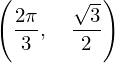

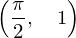

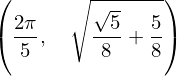

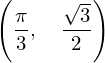

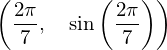

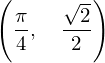

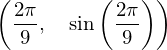

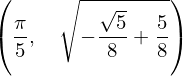

In [13]:
for j in range(1, 11):
    wert = sin(2*pi/j)
    display((2*pi/j, wert))

## Mehrere Zeichnungen in einem Bild

In [14]:
x = Symbol('x')
y = Symbol('y')

In [15]:
h = (x**2+y**2)**2 + 3*x**2*y - y**3
xn = np.linspace(-1, 1, 200)
yn = xn
hn = lambdify((x,y), h)
X, Y = np.meshgrid(xn, yn)

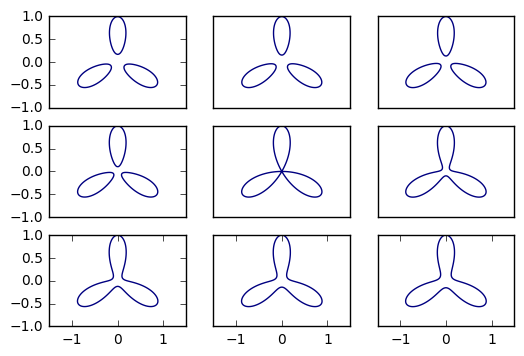

In [16]:
fig = plt.figure()
for j in range(9):
    fig.add_subplot(331+j)
    plt.contour(X, Y, hn(X, Y), [.001*(j-4)])
    plt.axis('equal')
    if j % 3 != 0:
        plt.yticks([])
    if j <= 5:
        plt.xticks([])
    else:
        plt.xticks([-1.0, 0.0, 1.0])
fig.savefig('9plots.png')  # pdf geht auch

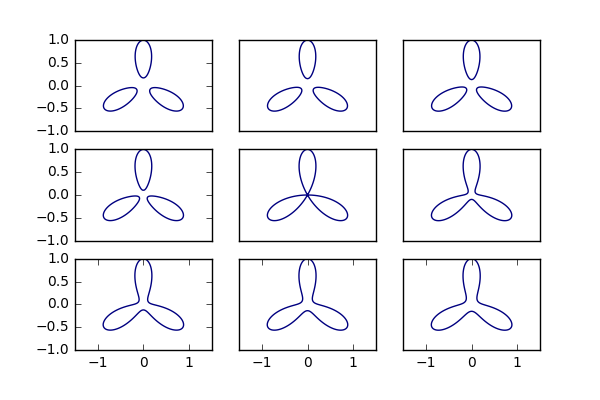

In [17]:
Image('9plots.png')  # kann pdf nicht anzeigen

## Funktionen

In [18]:
x = Symbol('x')
xn = np.arange(6)
zn = 1j + xn
x, xn, zn

(x,
 array([0, 1, 2, 3, 4, 5]),
 array([ 0.+1.j,  1.+1.j,  2.+1.j,  3.+1.j,  4.+1.j,  5.+1.j]))

In [19]:
def f(x):
    return x**3 + 2*x + 15

In [20]:
f(0)

In [21]:
f(0.)

In [22]:
f(0+0j)

(15+0j)

In [23]:
f(2*x)

In [24]:
f(xn)

array([ 15,  18,  27,  48,  87, 150])

Duck typing:  

“When I see a bird that walks like a duck and swims like a duck and quacks like a duck, I call that bird a duck.”

– James Whitcomb Riley

In [25]:
def g(x):
    return sin(x) + f(x)

In [26]:
g(-2*x)

In [27]:
g(pi)

In [28]:
g(3.1415)

In [29]:
# g(xn)  zeigt einen AttributeError

In [30]:
def abss(x):
    if x > 0:
        return x
    else:
        return -x

In [31]:
abss(-5)

In [32]:
# abss(x)  # TypeError

In [33]:
xp = Symbol('x_+', positive=True)
abss(xp)

## Zusammenfassen

In [34]:
x = Symbol('x')

In [35]:
a = (x**4-3*x**2+5)*exp(x**2)*sin(x)
a

In [36]:
da = diff(a, x, 3)
da

In [37]:
da.expand()

In [38]:
da.expand().collect(exp(x**2))

In [39]:
rcollect(collect(da.expand(), exp(x**2)), cos(x), sin(x))

## Trigonometrische Funktionen

In [40]:
x = Symbol('x')
y = Symbol('y')

In [41]:
a = cos(x+y)

In [42]:
A = expand(a, trig=True)
A

In [43]:
trigsimp(A)

In [44]:
c = tan(x)**2 + 1
c

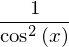

In [45]:
c.trigsimp()

In [46]:
d = tan(3*x)
d.simplify()

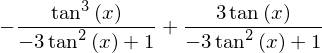

In [47]:
d.expand(trig=True)

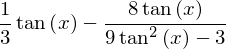

In [48]:
d.expand(trig=True).ratsimp()

## benutzerspezifische trigonometrische Vereinfachungen

In [49]:
b = sin(x) + sin(y)
b

In [50]:
b.trigsimp(method='fu')

Wie kompliziert ist dieser Ausdruck?

In [51]:
b.count_ops(visual=True)
    

In [52]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
#    print(opc)   # zur Fehlersuche
    wert = {}
    wert['ADD'] = 1
    wert['SIN'] = 1
    wert['MUL'] = -100
    return opc.subs(wert)

In [53]:
my_measure(b)

In [54]:
# b.trigsimp(method='fu', measure=my_measure) # TypeError

In [55]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
    wert = {}
    wert['ADD'] = 1
    wert['SIN'] = 1
    wert['MUL'] = -100
    wert['COS'] = 1
    wert['DIV'] = 1 
    wert['SUB'] = 1
    return opc.subs(wert)

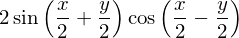

In [56]:
b.trigsimp(method='fu', measure=my_measure)

In [57]:
e = tan(x) + cot(y)
e.simplify()

In [58]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
#    print(opc)   # zur Fehlersuche
    wert = {}
    wert['ADD'] = 1
    wert['SIN'] = 1
    wert['COS'] = 1
    wert['TAN'] = 100 
    wert['COT'] = 100
    return opc.subs(wert)

In [59]:
# e.trigsimp(method='fu', measure=my_measure) # TypeError

In [60]:
def my_measure(expr):
    opc = expr.count_ops(visual=True)
    wert = {}
    wert['ADD'] = 1
    wert['SIN'] = 1
    wert['COS'] = 1
    wert['TAN'] = 100
    wert['COT'] = 100
    wert['DIV'] = 1
    return opc.subs(wert)

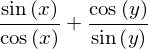

In [61]:
e1 = e.trigsimp(method='fu', measure=my_measure)
e1

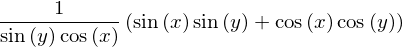

In [62]:
e2 = e1.ratsimp()
e2

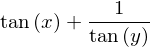

In [63]:
e2.trigsimp()

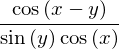

In [64]:
num, den = numer(e2), denom(e2)
num1 = num.trigsimp()
num1/den

## Potenzfunktionen

In [65]:
f = x**Rational(1,3)

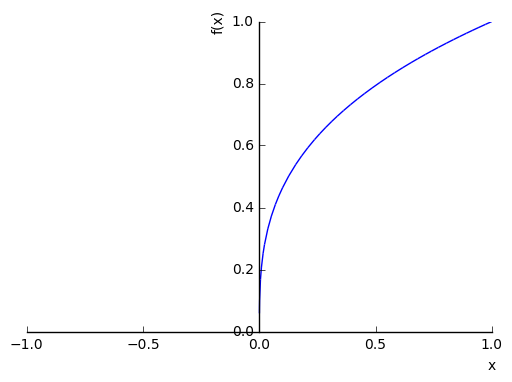

In [66]:
plot(f, (x, -1, 1));

In [67]:
z = f.subs(x, -1)
z

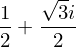

In [68]:
expand(z, complex=True)

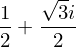

In [69]:
expand(exp(pi*I/3), complex=True)

In [70]:
g = sign(x)*abs(x)**Rational(1,3)
g

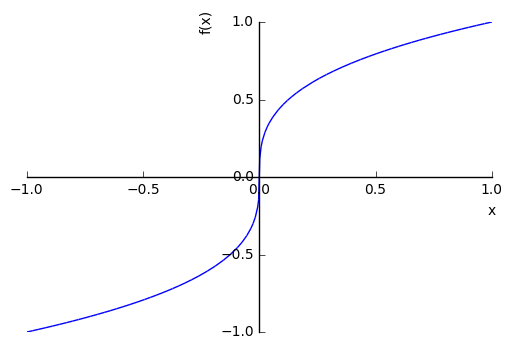

In [71]:
plot(g, (x,-1,1));